# Try #1

[article eq(25)](https://iopscience.iop.org/article/10.1088/1361-6595/ab0537)
<img src = "https://cdn.iopscience.com/images/0963-0252/28/4/043001/Full/psstab0537eqn49.gif">


In [1]:
import  numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [2]:
k = 8.617333262145e-5 #Boltzmann constant in eV⋅K**(−1)
assert int(k*300*40-1)==0, '300K not 1/40eV'

e = 1.602176634e-19 #Elementary electric charge C
k = 1.380649e-23 ##Boltzmann constant in J⋅K**(−1)
assert int(k*300/e*40-1)==0, '300K not 1/40eV'


In [33]:
def f(u, s, Te = 300, k = 1.380649e-23, e = 1.602176634e-19):
    return np.power(2/(3*k*Te)*gamma(5/(2*s)), 1.5)/(gamma(3/(2*s))**2.5)*np.exp(-(gamma(5/(2*s))*2*e*u/(gamma(3/(2*s))*3*k*Te))**s)

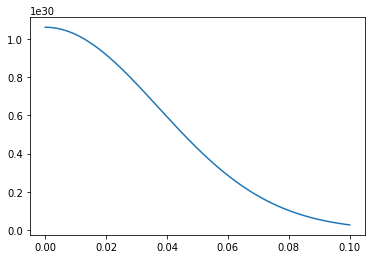

In [39]:
Te_range = np.linspace(300, 11600)
u = np.linspace(0,0.1, 100000)
plt.plot(u, f(u,2))

I do not like it. Had some problems... Let's tray another

# Tray #2

[comsol_blog](https://www.comsol.com/blogs/electron-energy-distribution-function/)



$$f(\epsilon)=\varphi^{-3/2}\beta_1\exp\left(-\left(\frac{\epsilon\beta_2}{\varphi}\right)^g\right)$$

$$\beta_1=\Gamma(5/2g)^{3/2}\Gamma(3/2g)^{-5/2},\ $$
$$\beta_2=\Gamma(5/2g)\Gamma(3/2g)^{-1}$$

Here, ϵ is the electron energy, (eV); $\varphi$  is the mean electron energy, (eV); and g is a factor between 1 and 2. For a Maxwell distribution function, g is equal to 1, while g equals 2 for a Druyvesteyn distribution. Lastly, $\Gamma$ is the incomplete Gamma function.

<b>Druyvesteyn EEDF is based on a constant (electron energy independent) cross section, the Maxwellian EEDF is based on constant collision frequency</b>

In [2]:
def f(ϵ, g, phi): #g = 1 for Maxwell, 2 for Druyvesteyn
    betta1 = ((gamma(2.5/g))**(1.5))/((gamma(1.5/g))**2.5)
    betta2 = (gamma(2.5/g))/(gamma(1.5/g))
    return (phi**(-1.5))*betta1*np.exp(-(ϵ*betta2/phi)**g)


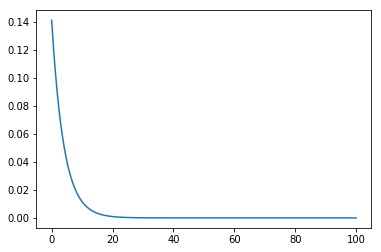

In [59]:
mean_energy = np.arange(2,11)
energy_range = np.linspace(0,100,1000) 
plt.plot(energy_range, f(energy_range,1,mean_energy[4]))

In [49]:
f(0, 1,1)

2.0729648968280134

# Try #3  (OK)
It seems, that in all these equations $\epsilon^{1/2}$ in numerator is dropped

Tried by hand and it is similar to [wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D0%BA%D1%81%D0%B2%D0%B5%D0%BB%D0%BB%D0%B0#%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%8D%D0%BD%D0%B5%D1%80%D0%B3%D0%B8%D0%B8)
<br><i>Hint</i><br>

$\Gamma(3/2) = \frac{\sqrt{\pi}}{2}$<br>
$\Gamma(5/2) = \Gamma(1+3/2) = \frac{3}{2}\Gamma(3/2)$

In [3]:
# copied from Try#2
def f(ϵ, g, phi): #g = 1 for Maxwell, 2 for Druyvesteyn
    betta1 = ((gamma(2.5/g))**(1.5))/((gamma(1.5/g))**2.5)
    betta2 = (gamma(2.5/g))/(gamma(1.5/g))
    return (phi**(-1.5))*betta1*np.exp(-(ϵ*betta2/phi)**g)


Text(0, 0.5, 'EEDF (eV$^{-1}$)')

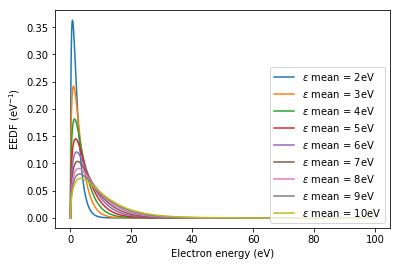

In [5]:
mean_energy = np.arange(2,11)
energy_range = np.linspace(0,100,1000) 
for k in mean_energy:
    plt.plot(energy_range, energy_range**0.5*f(energy_range,1,k), label = "$\epsilon$ mean = {}eV".format(k))
plt.legend(loc='lower right')
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-1}$)') # Electron energy distribution function

Text(0, 0.5, 'EEDF (eV$^{-3/2}$)')

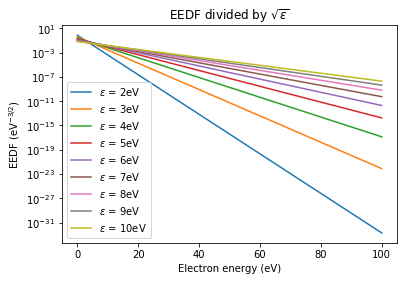

In [6]:

for k in mean_energy:
    plt.plot(energy_range, f(energy_range,1,k), label = "$\epsilon$ = {}eV".format(k))
plt.yscale('log')
plt.legend(loc='lower left')
plt.title("EEDF divided by $\sqrt{\epsilon}$")
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-3/2}$)') # Electron energy distribution function / sqrt(energy)


# Druyvesteyn and Maxwell

Text(0, 0.5, 'EEDF (eV$^{-1}$)')

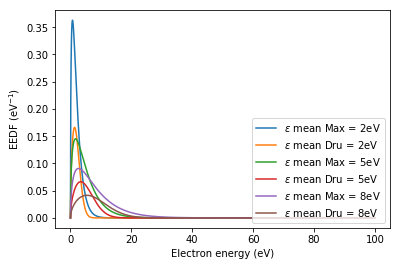

In [11]:
mean_energy = np.arange(2,11,3)
energy_range = np.linspace(0,100,1000) 
for k in mean_energy:
    plt.plot(energy_range, energy_range**0.5*f(energy_range,1,k), label = "$\epsilon$ mean Max = {}eV".format(k))
    plt.plot(energy_range, energy_range**0.5*f(energy_range,2,k), label = "$\epsilon$ mean Dru = {}eV".format(k))
plt.legend(loc='lower right')
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-1}$)') # Electron energy distribution function

Text(0, 0.5, 'EEDF (eV$^{-3/2}$)')

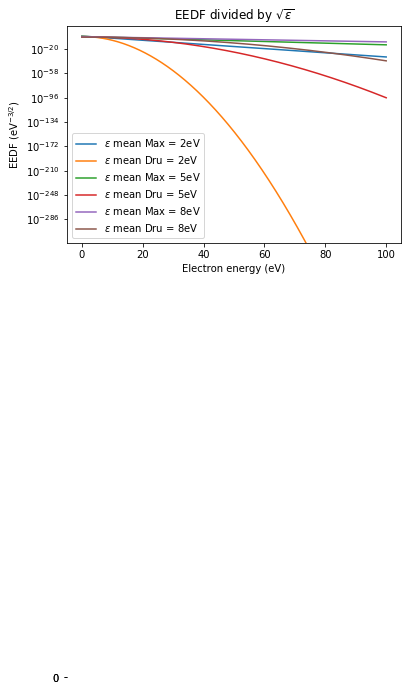

In [12]:
for k in mean_energy:
    plt.plot(energy_range, f(energy_range,1,k), label = "$\epsilon$ mean Max = {}eV".format(k))
    plt.plot(energy_range, f(energy_range,2,k), label = "$\epsilon$ mean Dru = {}eV".format(k))
plt.yscale('log')
plt.legend(loc='lower left')
plt.title("EEDF divided by $\sqrt{\epsilon}$")
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-3/2}$)') # Electron energy distribution function / sqrt(energy)

# From Maxwell to Druyvesteyn

Text(0, 0.5, 'EEDF (eV$^{-1}$)')

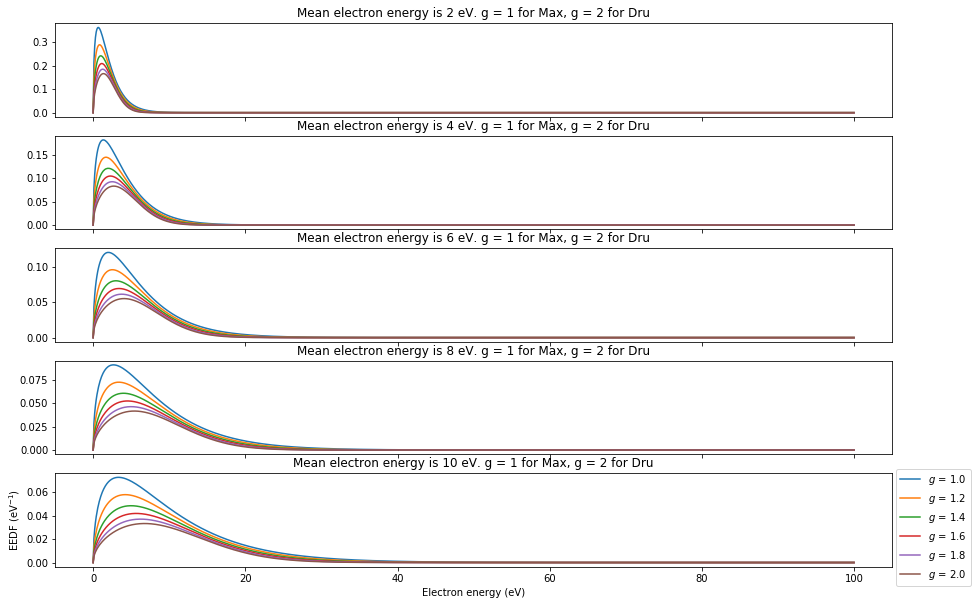

In [13]:
fig, ax = plt.subplots(5, 1, sharex='col', sharey='row', figsize = (15,10))
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(5):
    for k in range(0,11,2):
        ax[i].plot(energy_range, energy_range**0.5*f(energy_range,1+k/10,(i+1)*2), label = "$g$ = {}".format(1+k/10))
        ax[i].set_title("Mean electron energy is {} eV. g = 1 for Max, g = 2 for Dru".format((i+1)*2))

plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1.1)) 
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-1}$)') # Electron energy distribution function

Text(0, 0.5, 'EEDF (eV$^{-3/2}$)')

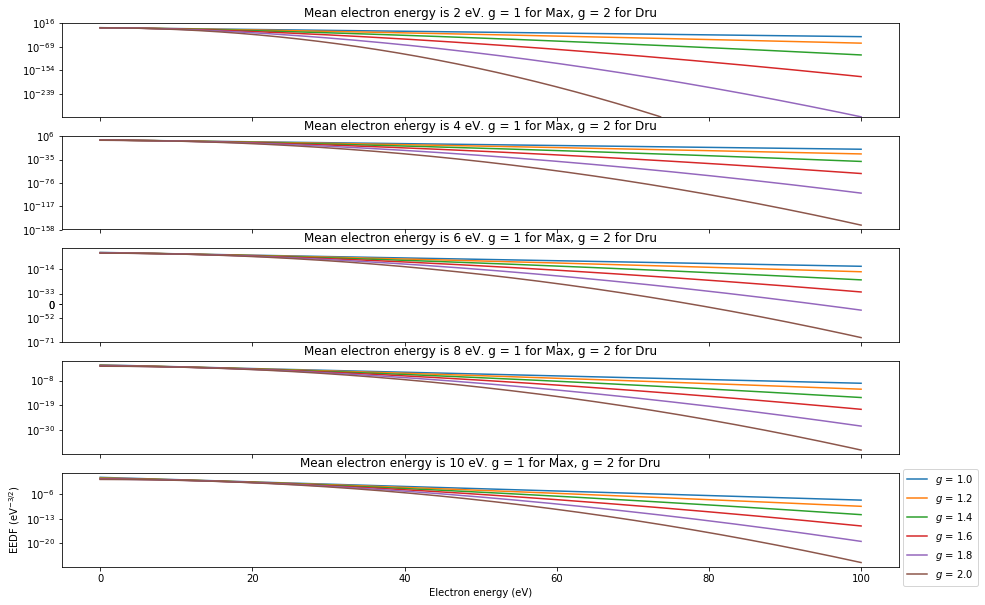

In [14]:
# LOG scale. Electron energy distribution function / sqrt(energy)

fig, ax = plt.subplots(5, 1, sharex='col', sharey='row', figsize = (15,10))
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(5):
    for k in range(0,11,2):
        ax[i].plot(energy_range, f(energy_range,1+k/10,(i+1)*2), label = "$g$ = {}".format(1+k/10))
        ax[i].set_yscale('log')
        ax[i].set_title("Mean electron energy is {} eV. g = 1 for Max, g = 2 for Dru".format((i+1)*2))

plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1.1)) 
plt.xlabel('Electron energy (eV)')
plt.ylabel('EEDF (eV$^{-3/2}$)') # Electron energy distribution function / sqrt(energy)
